# Case Study on ANOVA

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
#reading the dataset
data=pd.read_csv('Sales_data_zone_wise.csv')
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [3]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [4]:
##checking if there is any null values in the dataset
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [5]:
#describing the dataset
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# 1) The mean sales generated by each zone

In [6]:
zones=data[['Zone - A','Zone - B','Zone - C','Zone - D']]

In [7]:
#Mean sales generated by each zone
np.mean(zones).round(2)

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

Zone - D  generated the highest mean sales(1842926.76)

Zone - A  generated the lowest mean sales(1540493.14)

# 2) Total sales generated by all the zones for each month

In [8]:
data['Total_Sales']=zones.sum(axis=1)

In [9]:
#Total sales generated by all zones for each month
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


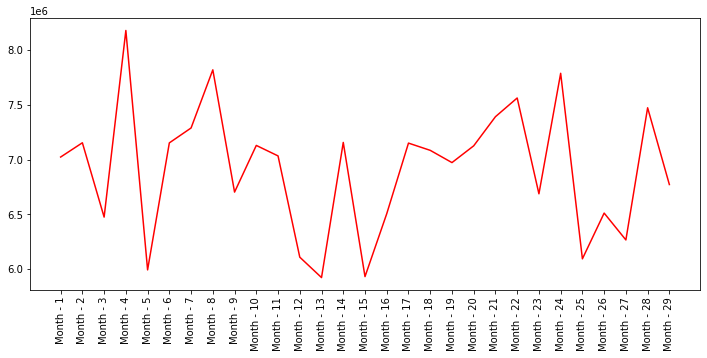

In [10]:
plt.figure(figsize=(12,5))
plt.plot(data.Month,data.Total_Sales,color='red')
plt.xticks(rotation=90)
plt.show()

Highest Sales generated in Month-4 is 8174449

Lowest Sales generated in Month-13 is 5925424

# 3) Check whether all the zones generate the same amount of sales

Here we using Oneway ANOVA test

ANOVA(Analysis of Variance)

Null Hypothesis (H0) : All the zones generated same amount of sales

Alternative Hypothesis (H1) : All the zones generated different amount of sales

significance level,alpha as 0.05

if p value <0.05, we reject the Null hypothesis

if p value >0.05, we accept the Null hypothesis

In [11]:
#oneway Anova test
alpha='0.05'
f_value,p_value=stat.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

In [12]:
#printing f_value
print(f_value)

5.672056106843581


In [13]:
#printing p_value
print(p_value)

0.0011827601694503335


In [14]:
#Checking p_value is greater than or less than alpha value
if p_value<0.05:
    print(" Since P value",p_value,"is less than",alpha,", we can reject the null hypothesis")
else:
    print(" Since P value",p_value,"is greater than",alpha,", we cant reject the null hypothesis")

 Since P value 0.0011827601694503335 is less than 0.05 , we can reject the null hypothesis


### Since p-value is less than 0.05 ,So  we reject null hypothesis and conclude that atleast one of the zone generated different amount of sales.